In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('alldata_1_for_kaggle.csv', encoding='latin-1')

In [4]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [5]:
df['0'].unique()


array(['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'], dtype=object)

In [6]:
df.columns = ['index', 'disease', 'text']


In [7]:
import string

def remove_punctuation(text):
  no_punc = [word for word in text if word not in string.punctuation]
  words_no_punc = ''.join(no_punc)
  return words_no_punc

df['text_no_punc'] = df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,index,disease,text,text_no_punc
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix ...


In [8]:
import re

def tokenize(text):
  split = re.split('\W+', text)
  return split

df['text_no_punc_split'] = df['text_no_punc'].apply(lambda x: tokenize(x.lower()))
df.head()

,index,disease,text,text_no_punc,text_no_punc_split
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single insti...,"[thyroid, surgery, in, children, in, a, single..."
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,"[, the, adopted, strategy, was, the, same, as,..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[coronary, arterybypass, grafting, thrombosis,..."
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an u...,"[, solitary, plasmacytoma, sp, of, the, skull,..."
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix ...,"[, this, study, aimed, to, investigate, serum,..."


In [9]:
import nltk

#nltk.download('stopwords')

stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

df['text_no_punc_split_no_stw'] = df['text_no_punc_split'].apply(lambda x: remove_stopwords(x))
df.head()

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,index,disease,text,text_no_punc,text_no_punc_split,text_no_punc_split_no_stw
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single insti...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti..."
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,"[, the, adopted, strategy, was, the, same, as,...","[, adopted, strategy, used, prior, years, base..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,..."
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an u...,"[, solitary, plasmacytoma, sp, of, the, skull,...","[, solitary, plasmacytoma, sp, skull, uncommon..."
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix ...,"[, this, study, aimed, to, investigate, serum,...","[, study, aimed, investigate, serum, matrix, m..."


In [10]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

lematizer = nltk.stem.WordNetLemmatizer()

def word_lemmatizer(text):
  lemma_text = [lematizer.lemmatize(word) for word in text]
  lemma_text_joined = ' '.join(lemma_text)
  return lemma_text_joined

df['text_no_punc_split_no_stw_lemm'] = df['text_no_punc_split_no_stw'].apply(lambda title: word_lemmatizer(title))
df.head()

[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/mac/nltk_data...


,index,disease,text,text_no_punc,text_no_punc_split,text_no_punc_split_no_stw,text_no_punc_split_no_stw_lemm
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single insti...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti...",thyroid surgery child single institution osama...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,"[, the, adopted, strategy, was, the, same, as,...","[, adopted, strategy, used, prior, years, base...",adopted strategy used prior year based four e...
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,...",coronary arterybypass grafting thrombosis ï br...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an u...,"[, solitary, plasmacytoma, sp, of, the, skull,...","[, solitary, plasmacytoma, sp, skull, uncommon...",solitary plasmacytoma sp skull uncommon clini...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix ...,"[, this, study, aimed, to, investigate, serum,...","[, study, aimed, investigate, serum, matrix, m...",study aimed investigate serum matrix metallop...


In [11]:
df.disease.isna().sum()

0

In [12]:
disease = pd.get_dummies(df.disease)
df = pd.concat([df, disease], axis=1)
df = df.drop(columns=['index', 'disease', 'text', 'text_no_punc', 'text_no_punc_split', 'text_no_punc_split_no_stw'])
df.head()

,text_no_punc_split_no_stw_lemm,Colon_Cancer,Lung_Cancer,Thyroid_Cancer
0,thyroid surgery child single institution osama...,0,0,1
1,adopted strategy used prior year based four e...,0,0,1
2,coronary arterybypass grafting thrombosis ï br...,0,0,1
3,solitary plasmacytoma sp skull uncommon clini...,0,0,1
4,study aimed investigate serum matrix metallop...,0,0,1


In [14]:
text = df['text_no_punc_split_no_stw_lemm'].values
label = df[['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer']].values

### Split data

In [16]:
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

## Model

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)
 
train_seq = tokenizer.texts_to_sequences(text_train)
test_seq = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(train_seq)
padded_test = pad_sequences(test_seq)

In [19]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 117,507
Trainable params: 117,507
Non-trainable params: 0
_________________________________________________________________


In [21]:
acc_thres = 0.99

class customCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}): 
    if(logs.get('accuracy') > acc_thres and logs.get('val_accuracy') > acc_thres):   
      print("\nReached %2.2f%% accuracy, stopping training . . ." %(acc_thres*100))   
      self.model.stop_training = True

callbacks = customCallback()

### train model


In [24]:
history = model.fit(
    padded_train, 
    label_train, 
    epochs=2, 
    validation_data=(padded_test, label_test), 
    callbacks=[callbacks]
    )

Epoch 1/2
190/190 [==============================] - 589s 3s/step - loss: 0.0366 - accuracy: 0.9840 - val_loss: 0.0388 - val_accuracy: 0.9822
Epoch 2/2
190/190 [==============================] - 1638s 9s/step - loss: 0.0278 - accuracy: 0.9860 - val_loss: 0.0312 - val_accuracy: 0.9815


In [26]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
  train_metrics = history.history[metric]
  val_metrics = history.history['val_' + metric]
  epochs = range(1, len(train_metrics) + 1)
  plt.rcParams["figure.figsize"] = (6,8)
  plt.plot(epochs, train_metrics)
  plt.plot(epochs, val_metrics)
  plt.title('Training and Validation ' + metric)
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend(["train_" + metric, 'val_' + metric], loc="best")
  plt.show()

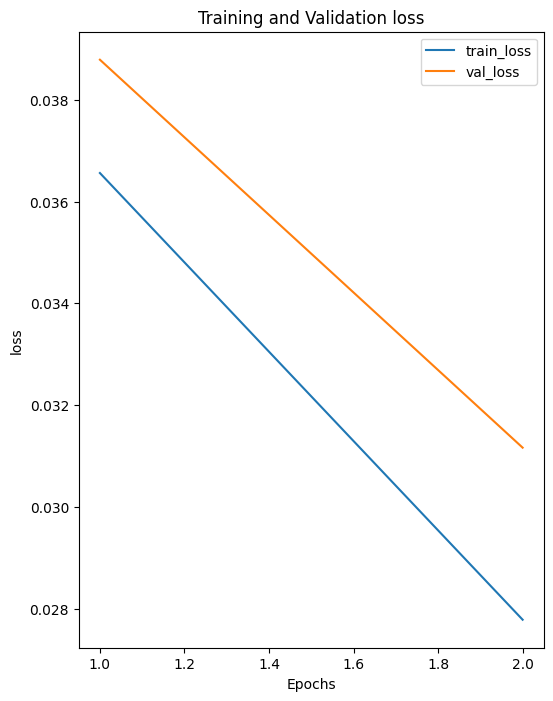

In [27]:
plot_metric(history, 'loss')

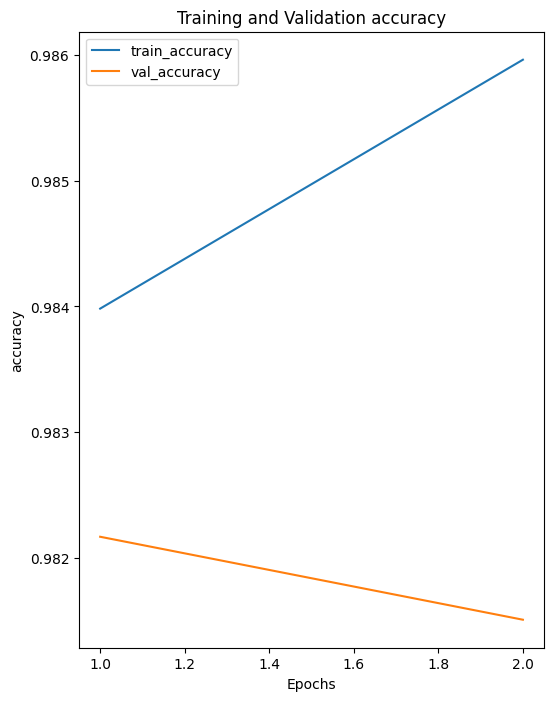

In [28]:
plot_metric(history, 'accuracy')